# Plot a Spherical Harmonics

Useful reference: https://balbuceosastropy.blogspot.co.uk/2015/06/spherical-harmonics-in-python.html

#### Setup Environment

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
#
# from os import system
# system('source ~/.virtual_enviroments/ringdownFD_nikhef/bin/activate')
from nrutils.core.basics import lalphenom
from kerr import rgb,gmvpfit,modelrd,anglep,qnmfit,leaver,ndflatten,sunwrap,alert,cyan,slm
from kerr.models import mmrdns as ns
from nrutils import scsearch,gwylm,FinalSpin0815,EradRational0815
# Setup plotting backend
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from matplotlib import cm, colors
#
import corner
#
from numpy import *
from numpy.linalg import pinv
#
from nrutils.core.units import *
#
from scipy.optimize import minimize
from os.path import expanduser

#### Calculate Harmonic over Sky

In [2]:

#
n = 260
th_ = linspace(0,pi,n)
ph_ = linspace(-pi,pi,n+1)

#
TH,PH = meshgrid(th_,ph_)

#
s = -2
l,m = 2,2
#
SYLM = sYlm(s,l,m,th_,ph_)
SYLM += sYlm(s,l,-m,th_,ph_)





(-0.40000000000000002,
 0.40000000000000002,
 -0.40000000000000002,
 0.40000000000000002)

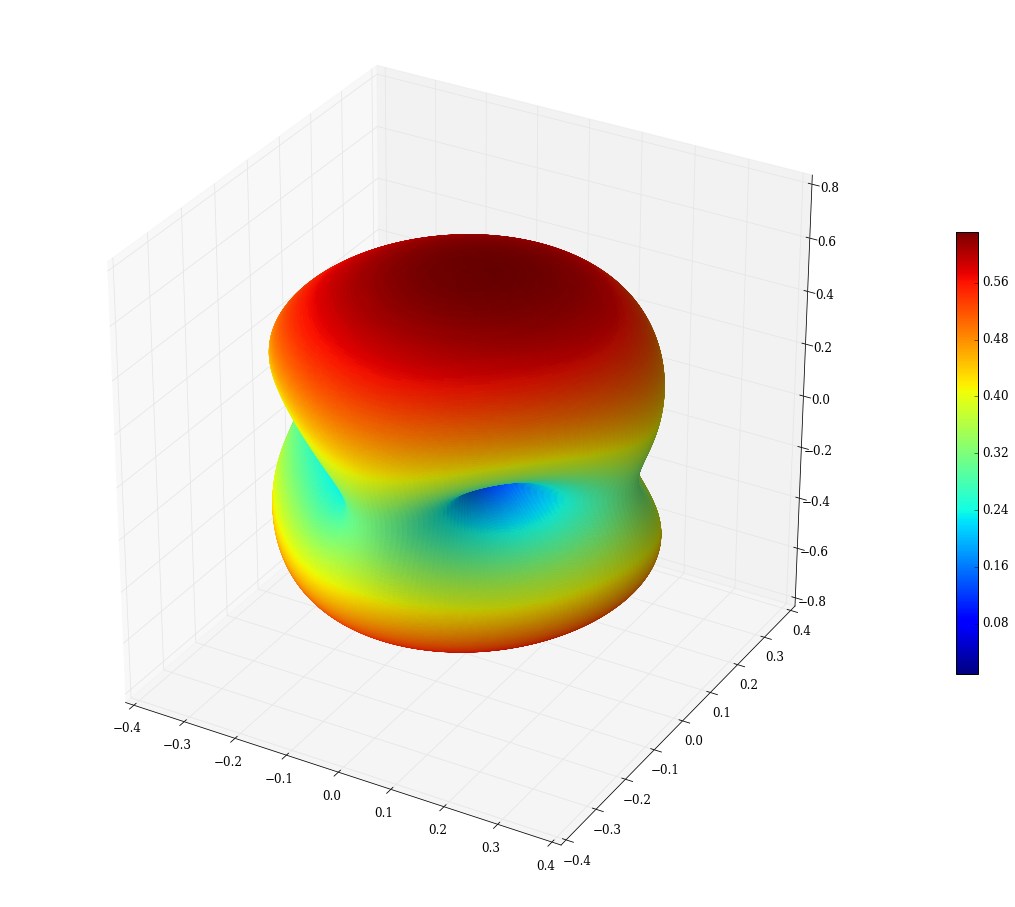

In [3]:
fig = figure(figsize=5*figaspect(1.2))
ax = fig.add_subplot(111, projection='3d')

#
R = abs(SYLM)
# R = SYLM.real


# The Cartesian coordinates of the unit sphere
X = R * sin(TH) * cos(PH)
Y = R * sin(TH) * sin(PH)
Z = R * cos(TH)

#
norm = colors.Normalize()

#
# N = (R - R.min())/(R.max() - R.min())
N = R/R.max()
# N = (SYLM - SYLM.min())/(SYLM.max() - SYLM.min())
# N = N.real

#
im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet( norm(R) ))

#
m = cm.ScalarMappable(cmap=cm.jet)
m.set_array(R)    # Assign the unnormalized data array to the mappable
                  # so that the scale corresponds to the values of R
    
fig.colorbar(m, shrink=0.33)
axis('equal');
axis('square');

# Plot the surface.
# surf = ax.plot_surface(X, Y, Z,rstride=1, cstride=1, facecolors=cm.jet(fcolors), alpha=0.8 )
# surf = ax.plot_surface(X, Y, Z,rstride=1, cstride=1, facecolors=cm.jet(fcolors) )

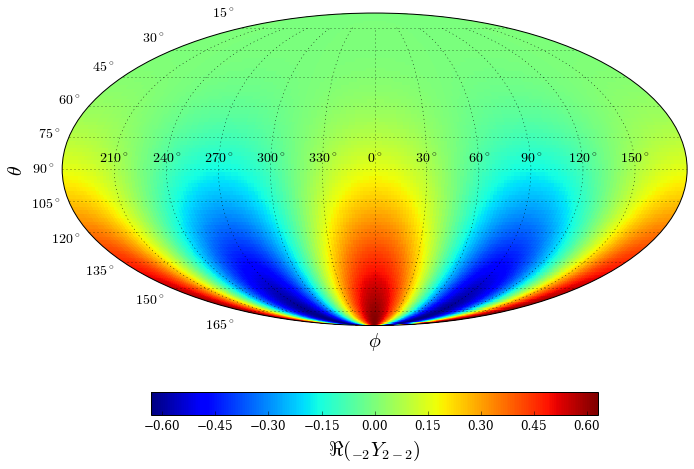

In [34]:
#
l,m = 2,-2
fig = figure( figsize= 2*figaspect(.68) )
ax = subplot(111,projection='mollweide')
sYlm_mollweide_plot(l,m,ax,N=200,form='r')